In [20]:
import face_recognition
from PIL import Image
import os
import cv2
from bitmap import BitMap

In [2]:
KNOWN_FACES_DIR = 'known_faces'
UNKNOWN_FACES_DIR = 'unknown_faces'
TOLERANCE = 0.6
FRAME_THICKNESS = 3
FONT_THICKNESS = 2
MODEL = 'cnn'  # default: 'hog', other one can be 'cnn' - CUDA accelerated (if available) deep-learning pretrained model


# Returns (R, G, B) from name
def name_to_color(name):
    # Take 3 first letters, tolower()
    # lowercased character ord() value rage is 97 to 122, substract 97, multiply by 8
    color = [(ord(c.lower())-97)*8 for c in name[:3]]
    return color


print('Loading known faces...')
known_faces = []
known_names = []

# We oranize known faces as subfolders of KNOWN_FACES_DIR
# Each subfolder's name becomes our label (name)
for name in os.listdir(KNOWN_FACES_DIR):

    # Next we load every file of faces of known person
    for filename in os.listdir(f'{KNOWN_FACES_DIR}/{name}'):

        # Load an image
        image = face_recognition.load_image_file(f'{KNOWN_FACES_DIR}/{name}/{filename}')

        # Get 128-dimension face encoding
        # Always returns a list of found faces, for this purpose we take first face only (assuming one face per image as you can't be twice on one image)
        encoding = face_recognition.face_encodings(image)[0]

        # Append encodings and name
        known_faces.append(encoding)
        known_names.append(name)




Loading known faces...


In [5]:
for filename in os.listdir(UNKNOWN_FACES_DIR):
    image = face_recognition.load_image_file(f'{UNKNOWN_FACES_DIR}/{filename}')

    # This time we first grab face locations - we'll need them to draw boxes
    locations = face_recognition.face_locations(image)

    # Now since we know loctions, we can pass them to face_encodings as second argument
    # Without that it will search for faces once again slowing down whole process
    encodings = face_recognition.face_encodings(image, locations)

    # We passed our image through face_locations and face_encodings, so we can modify it
    # First we need to convert it from RGB to BGR as we are going to work with cv2
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # But this time we assume that there might be more faces in an image - we can find faces of dirrerent people
    print(f', found {len(encodings)} face(s)')
    for face_encoding, face_location in zip(encodings, locations):

        # We use compare_faces (but might use face_distance as well)
        # Returns array of True/False values in order of passed known_faces
        results = face_recognition.compare_faces(known_faces, face_encoding, TOLERANCE)

        # Since order is being preserved, we check if any face was found then grab index
        # then label (name) of first matching known face withing a tolerance
        match = None
        if True in results:  # If at least one is true, get a name of first of found labels
            match = known_names[results.index(True)]
            print(f' - {match} from {results}')
            

, found 1 face(s)
 - noyon from [False, True]


In [3]:
top_left = (face_location[3], face_location[0])
            bottom_right = (face_location[1], face_location[2])

            # Get color by name using our fancy function
            color = name_to_color(match)

            # Paint frame
            cv2.rectangle(image, top_left, bottom_right, color, FRAME_THICKNESS)

            # Now we need smaller, filled grame below for a name
            # This time we use bottom in both corners - to start from bottom and move 50 pixels down
            top_left = (face_location[3], face_location[2])
            bottom_right = (face_location[1], face_location[2] + 22)

            # Paint frame
            cv2.rectangle(image, top_left, bottom_right, color, cv2.FILLED)

            # Wite a name
            cv2.putText(image, match, (face_location[3] + 10, face_location[2] + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (200, 200, 200), FONT_THICKNESS)

    # Show image
    cv2.imshow(filename, image)
    cv2.waitKey(0)
    cv2.destroyWindow(filename)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 22)

In [5]:
image = face_recognition.load_image_file('known_faces/noyon/noyon.jpg')

In [6]:
encoding = face_recognition.face_encodings(image)[0]

In [59]:
len(encoding)

128

In [8]:
image


array([[[33, 18, 15],
        [35, 17, 15],
        [35, 17, 15],
        ...,
        [89, 89, 81],
        [89, 89, 81],
        [89, 89, 81]],

       [[33, 18, 15],
        [35, 17, 15],
        [35, 17, 15],
        ...,
        [89, 89, 81],
        [89, 89, 81],
        [89, 89, 81]],

       [[33, 18, 15],
        [33, 18, 15],
        [35, 17, 15],
        ...,
        [89, 89, 81],
        [89, 89, 81],
        [89, 89, 81]],

       ...,

       [[88, 62, 47],
        [88, 62, 47],
        [86, 60, 45],
        ...,
        [82, 91, 96],
        [83, 92, 97],
        [84, 93, 98]],

       [[86, 60, 45],
        [86, 60, 45],
        [85, 59, 44],
        ...,
        [79, 90, 94],
        [77, 88, 92],
        [76, 87, 91]],

       [[85, 59, 44],
        [85, 59, 44],
        [84, 58, 43],
        ...,
        [78, 89, 93],
        [75, 86, 90],
        [73, 84, 88]]], dtype=uint8)

In [34]:
import numpy as np
import matplotlib.pyplot as plt

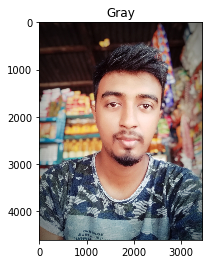

In [36]:
plt.imshow(image)
plt.title("Gray")
plt.show()

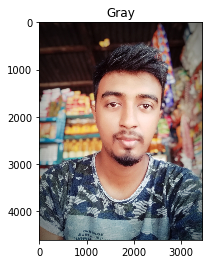

In [56]:
plt.imshow(im_rgb)
plt.title("Gray")
plt.show()

In [9]:
image.shape

(4608, 3456, 3)

In [13]:
img = Image.open('known_faces/noyon/noyon.jpg') 

In [53]:
img2 = cv2.imread('known_faces/noyon/noyon.jpg')
im_rgb=cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [54]:
img2.shape

(4608, 3456, 3)

In [57]:
im_rgb

array([[[33, 18, 15],
        [35, 17, 15],
        [35, 17, 15],
        ...,
        [89, 89, 81],
        [89, 89, 81],
        [89, 89, 81]],

       [[33, 18, 15],
        [35, 17, 15],
        [35, 17, 15],
        ...,
        [89, 89, 81],
        [89, 89, 81],
        [89, 89, 81]],

       [[33, 18, 15],
        [33, 18, 15],
        [35, 17, 15],
        ...,
        [89, 89, 81],
        [89, 89, 81],
        [89, 89, 81]],

       ...,

       [[88, 62, 47],
        [88, 62, 47],
        [86, 60, 45],
        ...,
        [82, 91, 96],
        [83, 92, 97],
        [84, 93, 98]],

       [[86, 60, 45],
        [86, 60, 45],
        [85, 59, 44],
        ...,
        [79, 90, 94],
        [77, 88, 92],
        [76, 87, 91]],

       [[85, 59, 44],
        [85, 59, 44],
        [84, 58, 43],
        ...,
        [78, 89, 93],
        [75, 86, 90],
        [73, 84, 88]]], dtype=uint8)

TypeError: Invalid shape (128,) for image data

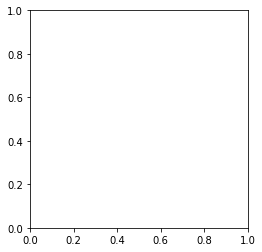

In [58]:
plt.imshow(encoding)
plt.title("Gray")
plt.show()